WASP_17b_periodogram.ipynb

In [1]:
import astropy
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296
search_result = lk.search_lightcurve(
        target=TIC,
        mission='TESS', author='SPOC')
lc_collection = search_result.download_all()
# lc = lc_collection.stitch(corrector_func=lambda x: x.
#                           remove_nans().normalize(unit='unscaled'))
lc = lc_collection[0]
lc = lc.normalize()
lc = lc.remove_outliers(sigma=10)


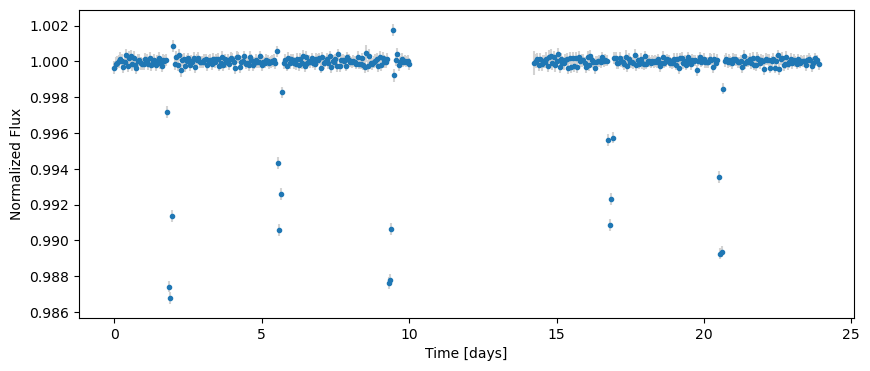

In [3]:
lc = lc.flatten()

fig = plt.figure(figsize=(10,4))

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')

# plt.title("PDCSAP")
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.show()

max_power 7054.406287
frequency_at_max_power 3.734028


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

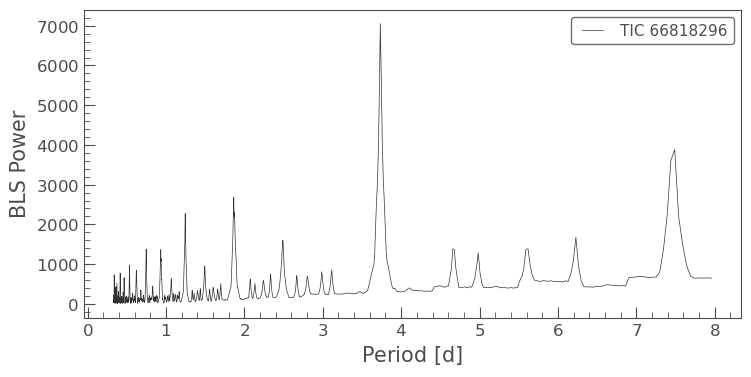

In [5]:
bls = lc.to_periodogram(method='bls')
print("max_power %f" % bls.max_power)
print("frequency_at_max_power %f" % bls.period_at_max_power.value)
bls.plot()